# Importing Essential Packages

In [1]:
import requests
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading the csv file

In [2]:
pro2 = pd.read_csv("Project Ackerman.csv")

## Dislplaying the csv file

In [3]:
pro2

,Rankings,Title,Episodes,Duration,Ratings,Members
0,1,Fullmetal Alchemist: Brotherhood,64.0,Apr 2009 - Jul 2010,9.24,1447702
1,2,Kimi no Na wa.,1.0,Aug 2016 - Aug 2016,9.13,984576
2,3,Shingeki no Kyojin Season 3 Part 2,10.0,NaN,9.13,230276
3,4,Steins;Gate,24.0,Apr 2011 - Sep 2011,9.13,1208315
4,5,Gintama°,51.0,Apr 2015 - Mar 2016,9.12,250826
5,6,Hunter x Hunter (2011),148.0,Oct 2011 - Sep 2014,9.12,913430
6,7,Ginga Eiyuu Densetsu,110.0,Jan 1988 - Mar 1997,9.10,155980
7,8,Gintama',51.0,Apr 2011 - Mar 2012,9.09,253724
8,9,Gintama': Enchousen,13.0,Oct 2012 - Mar 2013,9.05,150274
9,10,3-gatsu no Lion 2nd Season,22.0,Oct 2017 - Mar 2018,9.04,137428


In [4]:
pro2.dtypes

Rankings      int64
Title        object
Episodes    float64
Duration     object
Ratings     float64
Members       int64
dtype: object

# Cleaning the file

## Filling the NaN spaces

In [5]:
pro2['Duration'].fillna("Currently Ongoing",inplace=True)

In [6]:
pro2

,Rankings,Title,Episodes,Duration,Ratings,Members
0,1,Fullmetal Alchemist: Brotherhood,64.0,Apr 2009 - Jul 2010,9.24,1447702
1,2,Kimi no Na wa.,1.0,Aug 2016 - Aug 2016,9.13,984576
2,3,Shingeki no Kyojin Season 3 Part 2,10.0,Currently Ongoing,9.13,230276
3,4,Steins;Gate,24.0,Apr 2011 - Sep 2011,9.13,1208315
4,5,Gintama°,51.0,Apr 2015 - Mar 2016,9.12,250826
5,6,Hunter x Hunter (2011),148.0,Oct 2011 - Sep 2014,9.12,913430
6,7,Ginga Eiyuu Densetsu,110.0,Jan 1988 - Mar 1997,9.10,155980
7,8,Gintama',51.0,Apr 2011 - Mar 2012,9.09,253724
8,9,Gintama': Enchousen,13.0,Oct 2012 - Mar 2013,9.05,150274
9,10,3-gatsu no Lion 2nd Season,22.0,Oct 2017 - Mar 2018,9.04,137428


## counting unique values of episodes aired

In [7]:
pro2['Episodes'].value_counts()

1.0      85
12.0     35
26.0     28
25.0     27
13.0     27
24.0     17
2.0       8
11.0      8
10.0      7
4.0       4
51.0      4
22.0      4
23.0      3
3.0       3
39.0      3
50.0      2
14.0      2
7.0       2
8.0       2
15.0      2
47.0      2
291.0     1
201.0     1
110.0     1
148.0     1
75.0      1
74.0      1
43.0      1
33.0      1
203.0     1
77.0      1
79.0      1
40.0      1
94.0      1
6.0       1
62.0      1
27.0      1
112.0     1
99.0      1
101.0     1
120.0     1
37.0      1
52.0      1
64.0      1
Name: Episodes, dtype: int64

In [8]:
pro2['Episodes'] = pro2['Episodes'].fillna(12)

## Displaying the cleaned file

In [9]:
pro2

,Rankings,Title,Episodes,Duration,Ratings,Members
0,1,Fullmetal Alchemist: Brotherhood,64.0,Apr 2009 - Jul 2010,9.24,1447702
1,2,Kimi no Na wa.,1.0,Aug 2016 - Aug 2016,9.13,984576
2,3,Shingeki no Kyojin Season 3 Part 2,10.0,Currently Ongoing,9.13,230276
3,4,Steins;Gate,24.0,Apr 2011 - Sep 2011,9.13,1208315
4,5,Gintama°,51.0,Apr 2015 - Mar 2016,9.12,250826
5,6,Hunter x Hunter (2011),148.0,Oct 2011 - Sep 2014,9.12,913430
6,7,Ginga Eiyuu Densetsu,110.0,Jan 1988 - Mar 1997,9.10,155980
7,8,Gintama',51.0,Apr 2011 - Mar 2012,9.09,253724
8,9,Gintama': Enchousen,13.0,Oct 2012 - Mar 2013,9.05,150274
9,10,3-gatsu no Lion 2nd Season,22.0,Oct 2017 - Mar 2018,9.04,137428


## Summarizing the missing values

In [10]:
pro2.isnull().any() 

Rankings    False
Title       False
Episodes    False
Duration    False
Ratings     False
Members     False
dtype: bool

## Saving the Cleaned File

In [11]:
pro2.to_csv('Project LEVI.csv')

# Analysing the cleaned data

## Displaying Ongoing series

In [12]:
pro2[pro2['Duration'].str.contains('Currently Ongoing')]

,Rankings,Title,Episodes,Duration,Ratings,Members
2,3,Shingeki no Kyojin Season 3 Part 2,10.0,Currently Ongoing,9.13,230276
28,29,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze,39.0,Currently Ongoing,8.81,162765
92,93,One Piece,12.0,Currently Ongoing,8.53,856444
114,115,Kimetsu no Yaiba,26.0,Currently Ongoing,8.48,211769
116,117,Dororo,24.0,Currently Ongoing,8.47,277064
211,212,Bungou Stray Dogs 3rd Season,12.0,Currently Ongoing,8.33,96836
254,255,Carole & Tuesday,24.0,Currently Ongoing,8.29,80892
279,280,Tate no Yuusha no Nariagari,25.0,Currently Ongoing,8.27,363769
288,289,Detective Conan,12.0,Currently Ongoing,8.25,181247
296,297,Diamond no Ace: Act II,52.0,Currently Ongoing,8.23,17997


## Counting the Ongoing series

In [13]:
pro2[pro2['Duration'].str.contains('Currently Ongoing')].count()

Rankings    10
Title       10
Episodes    10
Duration    10
Ratings     10
Members     10
dtype: int64

In [14]:
pro2.describe()

,Rankings,Episodes,Ratings,Members
count,300.000000,300.000000,300.000000,3.000000e+02
mean,150.500000,19.326667,8.486467,2.968609e+05
std,86.746758,30.102722,0.215113,2.973007e+05
min,1.000000,1.000000,8.230000,6.299000e+03
25%,75.750000,1.000000,8.320000,8.402375e+04
50%,150.500000,12.000000,8.430000,1.889210e+05
75%,225.250000,25.000000,8.602500,3.886612e+05
max,300.000000,291.000000,9.240000,1.701606e+06


## Boxplot of Ratings

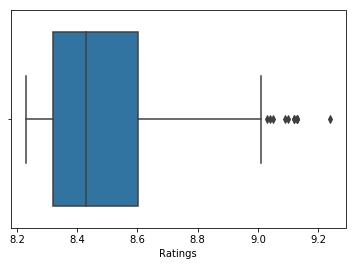

In [15]:
ax = sns.boxplot(x="Ratings", data=pro2)

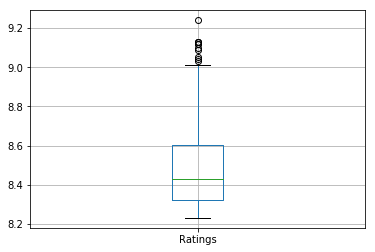

In [16]:
pro2.boxplot(column='Ratings')

## Boxplot of Members Watched

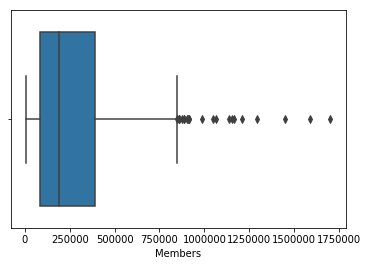

In [17]:
ax = sns.boxplot(x="Members", data=pro2)

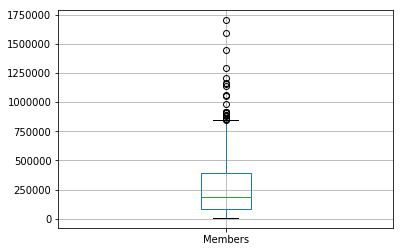

In [18]:
pro2.boxplot(column='Members')

## Boxplot of Episodes Aired

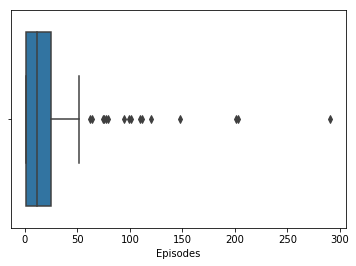

In [19]:
ax = sns.boxplot(x="Episodes", data=pro2)

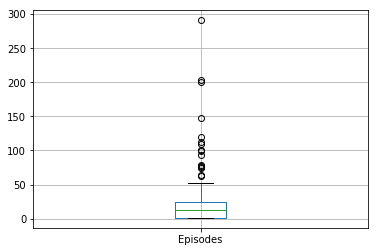

In [20]:
pro2.boxplot(column='Episodes')

## Total of all the unique values of episodes aired

In [21]:
pro2['Episodes'].nunique()

44

In [22]:
pro2["Episodes"].unique()

array([ 64.,   1.,  10.,  24.,  51., 148., 110.,  13.,  22.,  12., 201.,
         7.,  25.,  14.,  26.,  39.,  75.,   4.,  43.,  27.,  11.,  74.,
        37.,  47.,  15.,  23., 120., 101.,  99.,  50.,   2., 112.,  62.,
         3.,  33.,   6.,   8.,  94.,  40.,  79.,  77., 291., 203.,  52.])

In [23]:
pro2["Episodes"].value_counts()

1.0      85
12.0     37
26.0     28
25.0     27
13.0     27
24.0     17
2.0       8
11.0      8
10.0      7
4.0       4
51.0      4
22.0      4
23.0      3
3.0       3
39.0      3
50.0      2
14.0      2
7.0       2
8.0       2
15.0      2
47.0      2
291.0     1
201.0     1
110.0     1
148.0     1
75.0      1
74.0      1
43.0      1
33.0      1
203.0     1
77.0      1
79.0      1
40.0      1
94.0      1
6.0       1
62.0      1
27.0      1
112.0     1
99.0      1
101.0     1
120.0     1
37.0      1
52.0      1
64.0      1
Name: Episodes, dtype: int64

## Total of all the unique values of Ratings

In [24]:
pro2["Ratings"].nunique()

78

In [25]:
pro2["Ratings"].unique()

array([9.24, 9.13, 9.12, 9.1 , 9.09, 9.05, 9.04, 9.03, 9.01, 9.  , 8.99,
       8.98, 8.97, 8.96, 8.94, 8.91, 8.87, 8.86, 8.85, 8.83, 8.82, 8.81,
       8.8 , 8.79, 8.78, 8.77, 8.76, 8.74, 8.73, 8.72, 8.71, 8.7 , 8.69,
       8.68, 8.66, 8.65, 8.64, 8.63, 8.62, 8.61, 8.6 , 8.59, 8.58, 8.57,
       8.56, 8.55, 8.54, 8.53, 8.52, 8.51, 8.5 , 8.49, 8.48, 8.47, 8.46,
       8.45, 8.44, 8.43, 8.42, 8.41, 8.4 , 8.39, 8.38, 8.37, 8.36, 8.35,
       8.34, 8.33, 8.32, 8.31, 8.3 , 8.29, 8.28, 8.27, 8.26, 8.25, 8.24,
       8.23])

In [26]:
pro2["Ratings"].value_counts()

8.29    15
8.31    13
8.30    12
8.33    12
8.41    10
8.37    10
8.43     9
8.47     8
8.63     8
8.27     8
8.46     8
8.50     7
8.38     7
8.42     7
8.34     6
8.36     6
8.45     6
8.26     6
8.28     6
8.64     6
8.39     5
8.23     5
8.40     5
8.54     5
8.25     5
8.51     5
8.35     4
8.71     4
8.44     4
8.48     4
        ..
8.73     2
8.82     2
8.83     1
8.81     1
9.04     1
8.98     1
8.94     1
8.96     1
8.87     1
8.74     1
8.53     1
8.69     1
8.79     1
8.59     1
8.66     1
8.78     1
8.85     1
8.76     1
8.80     1
9.05     1
9.03     1
8.97     1
9.24     1
9.01     1
8.58     1
8.60     1
9.10     1
8.91     1
9.09     1
9.00     1
Name: Ratings, Length: 78, dtype: int64

## The reason we dont compare two columns here:

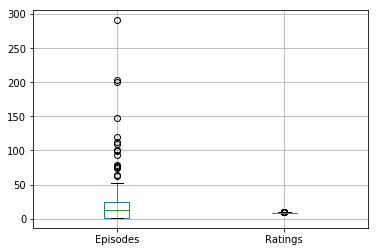

In [27]:
 boxplot = pro2.boxplot(column=['Episodes', 'Ratings'])


# Histograms Visual  Representation of Data

### Ratings

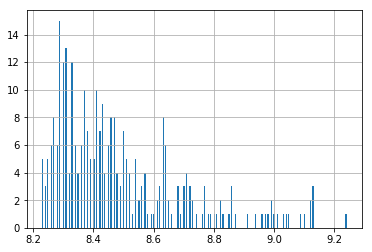

In [28]:
pro2['Ratings'].hist(bins=250)

### Episodes

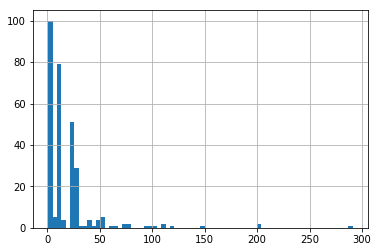

In [29]:
pro2['Episodes'].hist(bins=70)

# Analysing the Data using seaborn visualisation

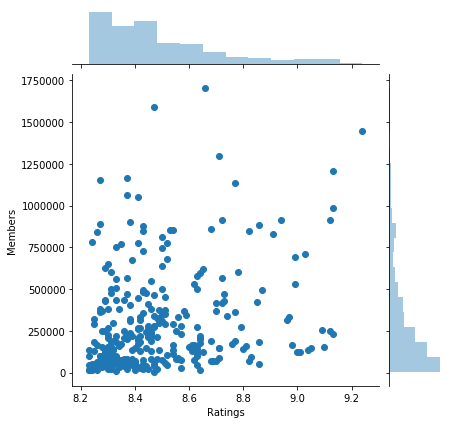

In [30]:
sns.jointplot(x="Ratings", y="Members", data=pro2);

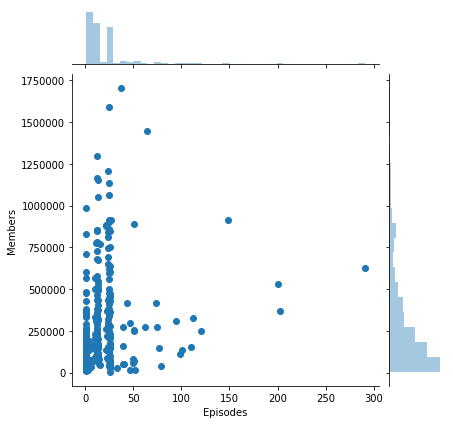

In [31]:
sns.jointplot(x="Episodes", y="Members", data=pro2);

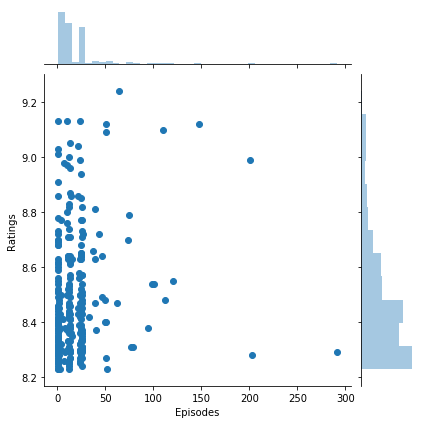

In [32]:
sns.jointplot(x="Episodes", y="Ratings", data=pro2);

## Ratings : Rankings

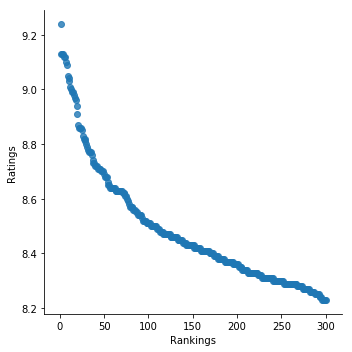

In [33]:
sns.lmplot( 'Rankings','Ratings', data=pro2, fit_reg=False)

In [34]:
pro2[pro2.Ratings == pro2.Ratings.max()]

,Rankings,Title,Episodes,Duration,Ratings,Members
0,1,Fullmetal Alchemist: Brotherhood,64.0,Apr 2009 - Jul 2010,9.24,1447702


In [35]:
pro2[pro2.Ratings == pro2.Ratings.min()]

,Rankings,Title,Episodes,Duration,Ratings,Members
295,296,Asobi Asobase,12.0,Jul 2018 - Sep 2018,8.23,138238
296,297,Diamond no Ace: Act II,52.0,Currently Ongoing,8.23,17997
297,298,High Score Girl: Extra Stage,3.0,Mar 2019 - Mar 2019,8.23,17683
298,299,Kuroko no Basket Movie 4: Last Game,1.0,Mar 2017 - Mar 2017,8.23,98689
299,300,Kuroko no Basket: Saikou no Present Desu,1.0,Dec 2015 - Dec 2015,8.23,47364


In [36]:
pro2[pro2.Rankings == pro2.Rankings.max()]

,Rankings,Title,Episodes,Duration,Ratings,Members
299,300,Kuroko no Basket: Saikou no Present Desu,1.0,Dec 2015 - Dec 2015,8.23,47364


In [37]:
pro2[pro2.Rankings == pro2.Rankings.min()]

,Rankings,Title,Episodes,Duration,Ratings,Members
0,1,Fullmetal Alchemist: Brotherhood,64.0,Apr 2009 - Jul 2010,9.24,1447702


In [38]:
pro2[pro2.Members == pro2.Members.max()]

,Rankings,Title,Episodes,Duration,Ratings,Members
53,54,Death Note,37.0,Oct 2006 - Jun 2007,8.66,1701606


In [39]:
pro2[pro2.Members == pro2.Members.min()]

,Rankings,Title,Episodes,Duration,Ratings,Members
121,122,Pingu in the City (2018),26.0,Oct 2018 - Mar 2019,8.47,6299


In [40]:
pro2[pro2.Episodes == pro2.Episodes.max()]

,Rankings,Title,Episodes,Duration,Ratings,Members
255,256,Dragon Ball Z,291.0,Apr 1989 - Jan 1996,8.29,625089


In [41]:
pro2[pro2.Episodes == pro2.Episodes.min()]

,Rankings,Title,Episodes,Duration,Ratings,Members
1,2,Kimi no Na wa.,1.0,Aug 2016 - Aug 2016,9.13,984576
10,11,Koe no Katachi,1.0,Sep 2016 - Sep 2016,9.03,707796
11,12,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,1.0,Jul 2013 - Jul 2013,9.01,124195
19,20,Sen to Chihiro no Kamikakushi,1.0,Jul 2001 - Jul 2001,8.91,833158
22,23,Kizumonogatari III: Reiketsu-hen,1.0,Jan 2017 - Jan 2017,8.86,184441
31,32,Mononoke Hime,1.0,Jul 1997 - Jul 1997,8.78,600468
38,39,Ookami Kodomo no Ame to Yuki,1.0,Jul 2012 - Jul 2012,8.73,429941
40,41,Howl no Ugoku Shiro,1.0,Nov 2004 - Nov 2004,8.72,564475
46,47,Fate/stay night Movie: Heaven's Feel - II. Los...,1.0,Jan 2019 - Jan 2019,8.70,70770
48,49,Suzumiya Haruhi no Shoushitsu,1.0,Feb 2010 - Feb 2010,8.70,370736


In [42]:
pro2[pro2.Episodes == pro2.Episodes.min()].count()

Rankings    85
Title       85
Episodes    85
Duration    85
Ratings     85
Members     85
dtype: int64

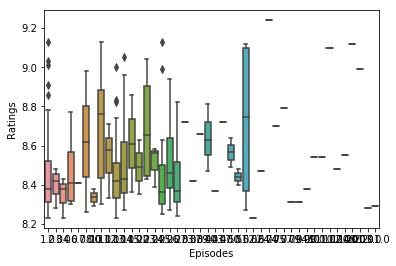

In [43]:
sns.boxplot(x='Episodes',y='Ratings',data=pro2)

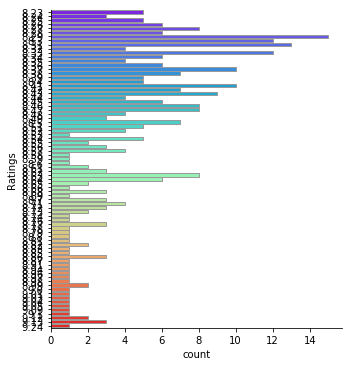

In [44]:
sns.catplot(y="Ratings", kind="count",
            palette="rainbow", edgecolor=".6",
            data=pro2);

/Users/bharathsimha/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/bharathsimha/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


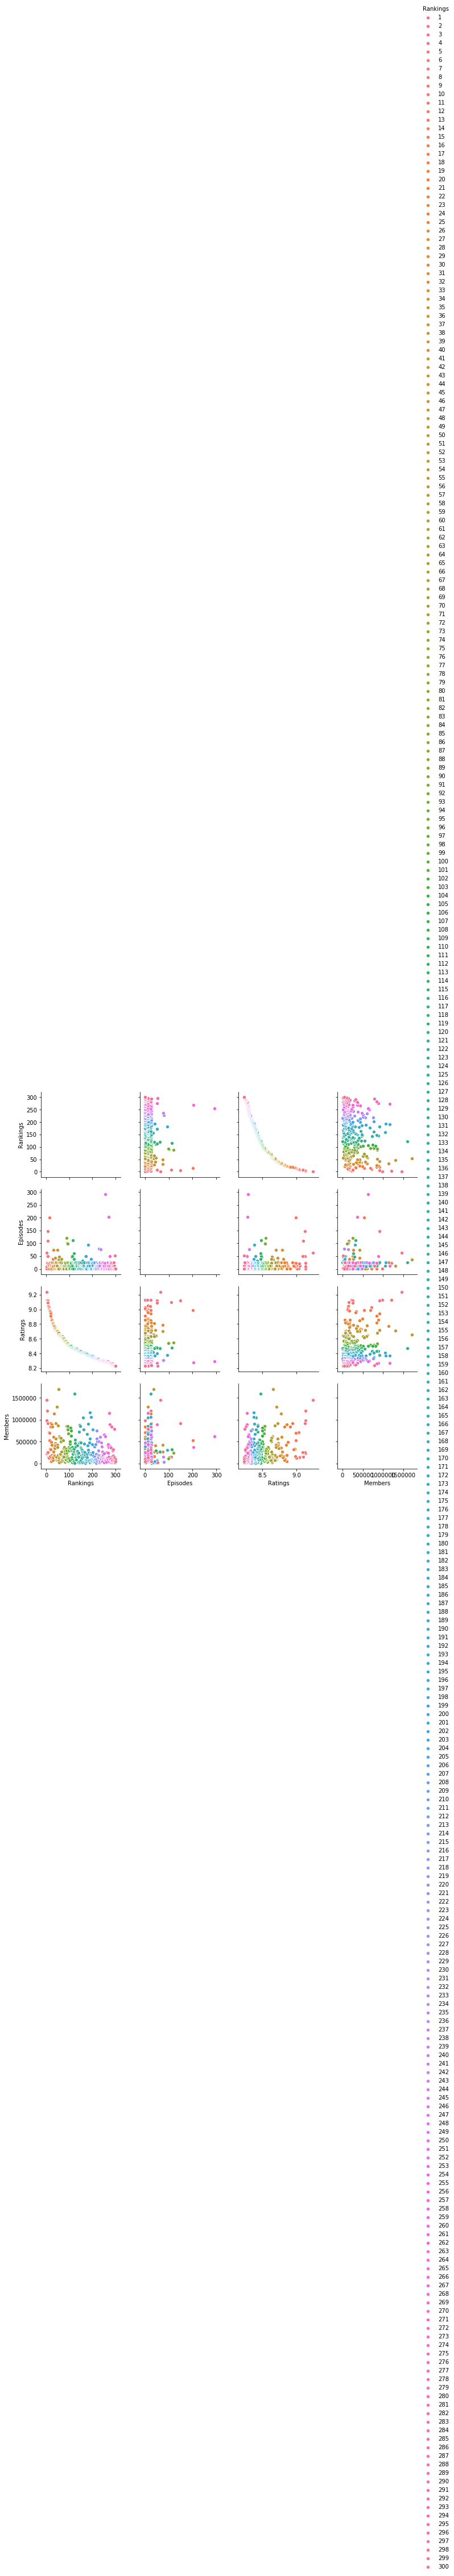

In [45]:
sns.pairplot(pro2, hue="Rankings")